# 8. Final project

Notebook to recognize and categorize taps in an image


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

First, load the dataset:
We see there are:
* 1 tap  rounded black
* 1 tap  rounded white
* 3 taps rounded blue
* 2 taps rounded red
* 2 taps squared red
* 1 tap  squared yellow
* 1 tap  elliptical pink

Given all these, in some pictures maybe some of there are not include. 
We assume this taps have always same size




Steps:

1. Load image
2. Convert tu RGB
3. Crop image


## Crop image

We crop the image as there is too much backround above and below ROI. These parts of the background (top and bottom) are affected by the light (lighter), so cropping the images we assure a better change to detect lighter objects.

(4000, 3000, 3)


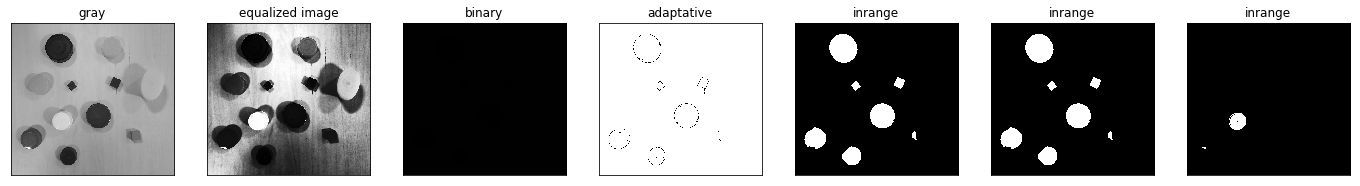

In [23]:
image = cv2.imread('final_project_imgs/5.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_copy = image.copy()
# image_copy =  cv2.resize(image_copy,(600,600))

# crop images
print(image_copy.shape) #(4000, 3000)
image_copy = image_copy[500:3300, :]




gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

# blurred = cv2.GaussianBlur(gray, (5,5), 0)
# like gaussian, but transform only pixels with same intensity values. Because of that,
# is highly effective in noise removal while keeping edges sharp
blurred = cv2.bilateralFilter(gray, 15, 75, 75)



th_binary = cv2.threshold(blurred, 100, 1, cv2.THRESH_BINARY)[1]
th_adaptative = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
th_inrange = cv2.inRange(blurred, 0, 100)
th_inrange_white = cv2.inRange(blurred, 200, 255)

cv2.imwrite('11.jpg', gray)




# contrast  (equalization)
equal_image = cv2.equalizeHist(gray)

fig, axes = plt.subplots(1, 7, figsize=(24,12))
axes[0].imshow(gray, cmap='gray',  vmin=0, vmax=255)
axes[0].set_title('gray')
axes[1].imshow(equal_image, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('equalized image')
axes[2].imshow(th_binary, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('binary')
axes[3].imshow(th_adaptative, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('adaptative')
axes[4].imshow(th_inrange, cmap='gray', vmin=0, vmax=255)
axes[4].set_title('inrange')
axes[5].imshow(th_inrange, cmap='gray', vmin=0, vmax=255)
axes[5].set_title('inrange')
axes[6].imshow(th_inrange_white, cmap='gray', vmin=0, vmax=255)
axes[6].set_title('inrange')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])


In [8]:
# We can obtain the HSV value picking one BGR color and using hsv transformation
def rgb2hsv(r, g, b):
  rgb = np.uint8([[[r, g, b]]])
  hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
  return int(hsv[0][0][0]), int(hsv[0][0][1]), int(hsv[0][0][2])
        
hsv_value = rgb2hsv(30,177,255)
print (hsv_value)

maskHSV = cv2.inRange(hue, 90, 110)
color_filtred = cv2.bitwise_and(image_BGR, image_BGR, mask = maskHSV) 

# Represent with matplotlib the image. We can obtain his pixel values and coordinates.
fig, axes = plt.subplots(1, 2, figsize=(48, 48))
axes[0].imshow(maskHSV,cmap = 'gray')
axes[0].set_title('Hue mask')
axes[1].imshow(color_filtred)
axes[1].set_title('Segmented')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

(100, 225, 255)


NameError: name 'hue' is not defined

Find contours and draw them in original image

In [ ]:
# Find contours in the thresholded image
cnts = cv2.findContours(HAY QUE PONER UN THRESHOLD AQUI, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Grab the appropriate tuple value based on whether 
# we are using OpenCV 2.4, 3, or 4.
cnts = imutils.grab_contours(cnts)

# (image,contours,number of contours (-1 = all),color to draw, width (-1 =filled)
cv2.drawContours(image_copy, cnts, -1, (0, 255, 0), 8)

# show thresholded image
fig, axes = plt.subplots(1, 1, figsize=(48, 24))
axes.imshow(image_copy, cmap='gray', vmin=0, vmax=255)
axes.set_title('Original image contoured')
